# Project 1: Regression on real estate market - Kings County

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from scipy import stats

## Read the file and see the data

In [2]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv", na_values="?")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
# just to have it
print(f"Length: {len(df)}")
print(f"Shape: {df.shape}")

Length: 21597
Shape: (21597, 21)


## Drop useless, deal with NaN, check for outliners

In [4]:
# drop "id" column
df.drop("id", inplace=True, axis=1)
df.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3        1.0         1180      5650     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180            0.0      1955   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650

In [5]:
# check for missings
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

In [6]:
df.fillna(0, inplace=True)

missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Empty DataFrame
Columns: [Number, Percentage]
Index: []

In [7]:
# hopefully no negatives
print(df.min())

date             1/10/2015
price                78000
bedrooms                 1
bathrooms              0.5
sqft_living            370
sqft_lot               520
floors                   1
waterfront               0
view                     0
condition                1
grade                    3
sqft_above             370
sqft_basement            0
yr_built              1900
yr_renovated             0
zipcode              98001
lat                47.1559
long              -122.519
sqft_living15          399
sqft_lot15             651
dtype: object


In [8]:
# checking for outliners
print(df.max())

date             9/9/2014
price             7.7e+06
bedrooms               33
bathrooms               8
sqft_living         13540
sqft_lot          1651359
floors                3.5
waterfront              1
view                    4
condition               5
grade                  13
sqft_above           9410
sqft_basement        4820
yr_built             2015
yr_renovated         2015
zipcode             98199
lat               47.7776
long             -121.315
sqft_living15        6210
sqft_lot15         871200
dtype: object


In [9]:
# found bedrooms
df[df["bedrooms"] >= 10]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8748    8/21/2014   520000.0        11       3.00         3000      4960   
13301   8/14/2014  1150000.0        10       5.25         4590     10920   
15147  10/29/2014   650000.0        10       2.00         3610     11914   
15856   6/25/2014   640000.0        33       1.75         1620      6000   
19239  12/29/2014   660000.0        10       3.00         2920      3745   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
8748      2.0         0.0   0.0          3      7        2400          600.0   
13301     1.0         0.0   2.0          3      9        2500         2090.0   
15147     2.0         0.0   0.0          4      7        3010          600.0   
15856     1.0         0.0   0.0          5      7        1040          580.0   
19239     2.0         0.0   0.0          4      7        1860         1060.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
8748       1918        1999.0    98106  47.5560 -122.363           1420   
13301      2008           0.0    98004  47.5861 -122.113           2730   
15147      1958           0.0    98006  47.5705 -122.175           2040   
15856      1947           0.0    98103  47.6878 -122.331           1330   
19239      1913           0.0    98105  47.6635 -122.320           1810   

       sqft_lot15  
8748         4960  
13301       10400  
15147       11914  
15856        4700  
19239        3745

In [10]:
# find and remove outliers outliners are "bedrooms" > 10
df.bedrooms = df.bedrooms.apply(lambda x: None if x > 10 else x)
# and the one (line 15147) with 10 to 2 bedrooms bathrooms ratio
df.bedrooms.drop([15147], axis=0)
df[df["bedrooms"] >= 10]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
13301   8/14/2014  1150000.0      10.0       5.25         4590     10920   
15147  10/29/2014   650000.0      10.0       2.00         3610     11914   
19239  12/29/2014   660000.0      10.0       3.00         2920      3745   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
13301     1.0         0.0   2.0          3      9        2500         2090.0   
15147     2.0         0.0   0.0          4      7        3010          600.0   
19239     2.0         0.0   0.0          4      7        1860         1060.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
13301      2008           0.0    98004  47.5861 -122.113           2730   
15147      1958           0.0    98006  47.5705 -122.175           2040   
19239      1913           0.0    98105  47.6635 -122.320           1810   

       sqft_lot15  
13301       10400  
15147       11914  
19239        3745

In [11]:
# looks great, outliners are removed
print(df.max())

date             9/9/2014
price             7.7e+06
bedrooms               10
bathrooms               8
sqft_living         13540
sqft_lot          1651359
floors                3.5
waterfront              1
view                    4
condition               5
grade                  13
sqft_above           9410
sqft_basement        4820
yr_built             2015
yr_renovated         2015
zipcode             98199
lat               47.7776
long             -121.315
sqft_living15        6210
sqft_lot15         871200
dtype: object


In [12]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(10), int64(9), object(1)
memory usage: 3.3+ MB


In [13]:
# df is about one year 09.09.2014 to 01.10.2019
# dateobject to int = YYYMMDD
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%y%m%d")

In [14]:
# ceck
df[200:205]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
200  150311  210000.0       3.0        1.0          860     11725     1.0   
201  141112  297000.0       3.0        2.5         1940     14952     2.0   
202  140716  470000.0       3.0        1.0         1010      5000     1.0   
203  140804  226500.0       3.0        1.5         1300      7370     1.0   
204  150303  274250.0       3.0        1.0          910      8450     1.0   

     waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
200         0.0   0.0          4      6         860            0.0      1943   
201         0.0   0.0          3      8        1940            0.0      1994   
202         0.0   0.0          3      7        1010            0.0      1952   
203         0.0   0.0          4      7         900          400.0      1976   
204         0.0   0.0          4      6         910            0.0      1962   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
200           0.0    98056  47.5093 -122.184           1300        9514  
201           0.0    98042  47.3777 -122.165           2030       10450  
202           0.0    98107  47.6750 -122.394           1680        5000  
203           0.0    98023  47.3025 -122.370           1430        7500  
204           0.0    98059  47.4787 -122.158           1400        8040

In [15]:
# still transformation to int() needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(10), int64(9), object(1)
memory usage: 3.3+ MB


In [16]:
df["date"] = df["date"].astype(int)
df.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  141013  221900.0       3.0        1.0         1180      5650     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3      7        1180            0.0      1955   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650

In [17]:
# better save than sorry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(10), int64(10)
memory usage: 3.3 MB


In [18]:
# all elem in list are pot features, but "sqft_basement" has to be transformed
pot_features = list(df.columns)
pot_features

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

## Adding features

In [19]:
## Price sqft_living
series_sqft_living_price = round(df["price"] / df["sqft_living"], 2)
series_sqft_living_price.name = "sqft_l_price"
print(series_sqft_living_price.head(3))
df = df.join(series_sqft_living_price)

0    188.05
1    209.34
2    233.77
Name: sqft_l_price, dtype: float64


### Playground

In [20]:
# fresh new dataframs for graphics
df_less_250k = df[df["price"] < 250001]

# cool querys
df_less_500k = df.query('price >= 250000 and price <= 500000')
df_less_1mio = df.query('price >= 500000 and price <= 1000000')

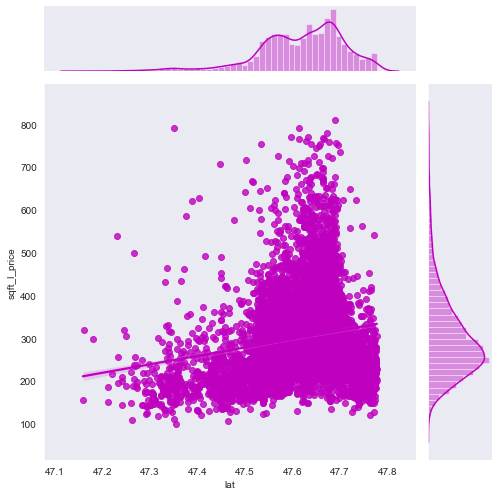

In [21]:
# upper class objects
sns.set_style(style="dark")
g = sns.jointplot(x="lat", y="sqft_l_price", data=df_less_1mio,
                  kind="reg", truncate=True,
                  color="m", height=7)
plt.savefig('figures/jointplot-sqft_above-price_less_500k.png')

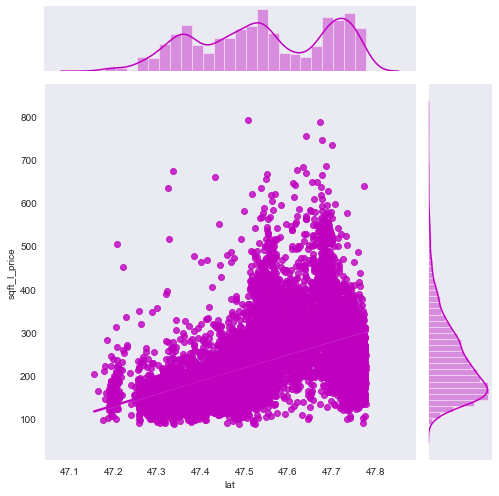

In [22]:
# upper middle class objects
g = sns.jointplot(x="lat", y="sqft_l_price", data=df_less_500k,
                  kind="reg", truncate=True,
                  color="m", height=7)
plt.savefig('figures/jointplot-sqft_above-price_less_500k.png')

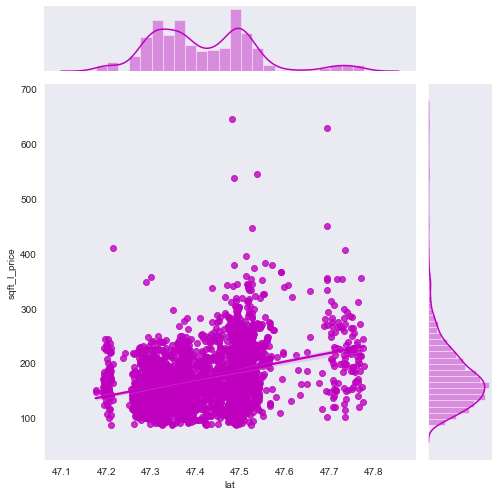

In [23]:
sns.set_style(style="dark")
g = sns.jointplot(x="lat", y="sqft_l_price", data=df_less_250k,
                  kind="reg", truncate=True,
                  color="m", height=7)
plt.savefig('figures/jointplot-sqft_above-price_less_1mio.png')

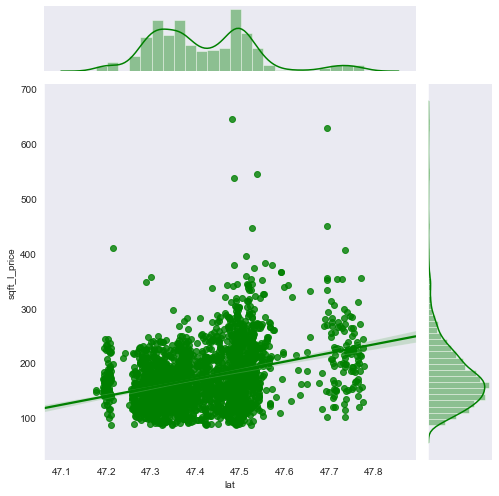

In [24]:
g = sns.jointplot(x="lat", y="sqft_l_price", data=df_less_250k,
                  kind="reg", truncate=False,
                  color="g", height=7)

plt.savefig('figures/jointplot-sqdt_p-lat-less_250k.png')

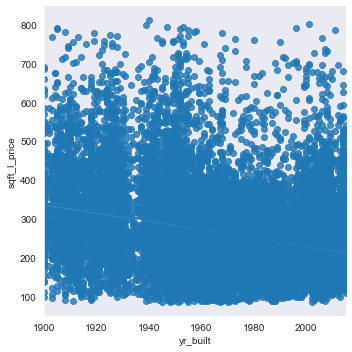

In [25]:
sns.lmplot(y="sqft_l_price", x="yr_built", data=df)
plt.savefig('figures/scatter-price_sqft-yr_build.png')

In [26]:
# start with a pairplot
# sns.pairplot(df)
# plt.savefig('figures/pairplot.png')

## Getting some basic statistics

In [27]:
df.describe().round(2)

date       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count   21597.00    21597.00  21595.00   21597.00     21597.00    21597.00   
mean   143902.70   540296.57      3.37       2.12      2080.32    15099.41   
std      4436.65   367368.14      0.90       0.77       918.11    41412.64   
min    140502.00    78000.00      1.00       0.50       370.00      520.00   
25%    140722.00   322000.00      3.00       1.75      1430.00     5040.00   
50%    141016.00   450000.00      3.00       2.25      1910.00     7618.00   
75%    150217.00   645000.00      4.00       2.50      2550.00    10685.00   
max    150527.00  7700000.00     10.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition  ...  sqft_above  \
count  21597.00    21597.00  21597.00   21597.00  ...    21597.00   
mean       1.49        0.01      0.23       3.41  ...     1788.60   
std        0.54        0.08      0.76       0.65  ...      827.76   
min        1.00        0.00      0.00       1.00  ...      370.00   
25%        1.00        0.00      0.00       3.00  ...     1190.00   
50%        1.50        0.00      0.00       3.00  ...     1560.00   
75%        2.00        0.00      0.00       4.00  ...     2210.00   
max        3.50        1.00      4.00       5.00  ...     9410.00   

       sqft_basement  yr_built  yr_renovated   zipcode       lat      long  \
count       21597.00  21597.00      21597.00  21597.00  21597.00  21597.00   
mean          285.72   1971.00         68.76  98077.95     47.56   -122.21   
std           439.82     29.38        364.04     53.51      0.14      0.14   
min             0.00   1900.00          0.00  98001.00     47.16   -122.52   
25%             0.00   1951.00          0.00  98033.00     47.47   -122.33   
50%             0.00   1975.00          0.00  98065.00     47.57   -122.23   
75%           550.00   1997.00          0.00  98118.00     47.68   -122.12   
max          4820.00   2015.00       2015.00  98199.00     47.78   -121.32   

       sqft_living15  sqft_lot15  sqft_l_price  
count       21597.00    21597.00      21597.00  
mean         1986.62    12758.28        264.14  
std           685.23    27274.44        110.00  
min           399.00      651.00         87.59  
25%          1490.00     5100.00        182.29  
50%          1840.00     7620.00        244.64  
75%          2360.00    10083.00        318.33  
max          6210.00   871200.00        810.14  

[8 rows x 21 columns]

<strong>Summery</strong>
1. The Datasaet has 20 columns and 21597 lines. 
2. All dates are machine readable: int64 or float64.
3. All columns are named, as they should.

## Correlation analysis

In [28]:
continuous_var = [
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 "sqft_l_price"]

In [29]:
categorical_var=["waterfront",                   
                 "condition", 
                 "grade", 
                 "zipcode"]

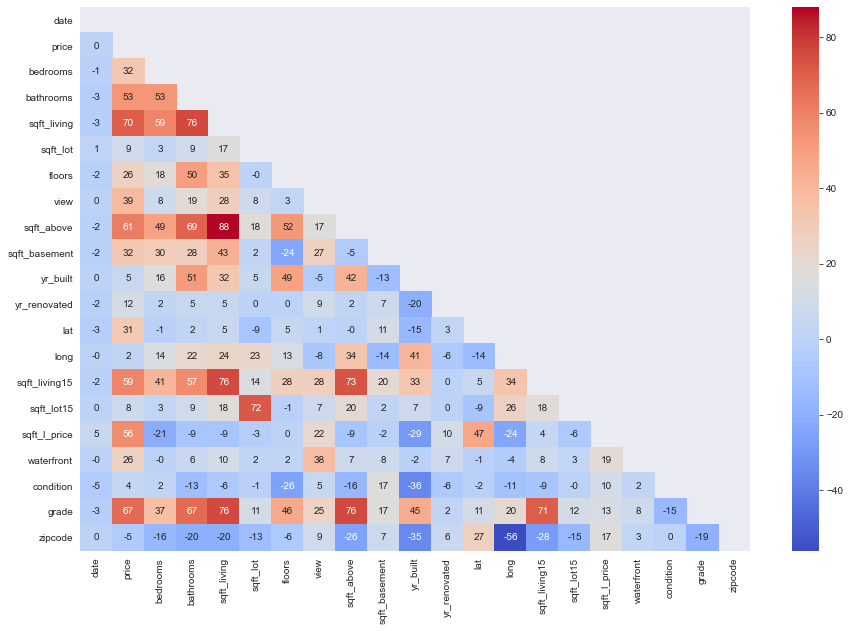

In [30]:
fig, ax = plt.subplots(figsize=(15,10))


df_dum = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df_dum.corr())
ax = sns.heatmap(round(df_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap="coolwarm")
                 
plt.savefig('figures/correlogram.png')

## Graphics

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.

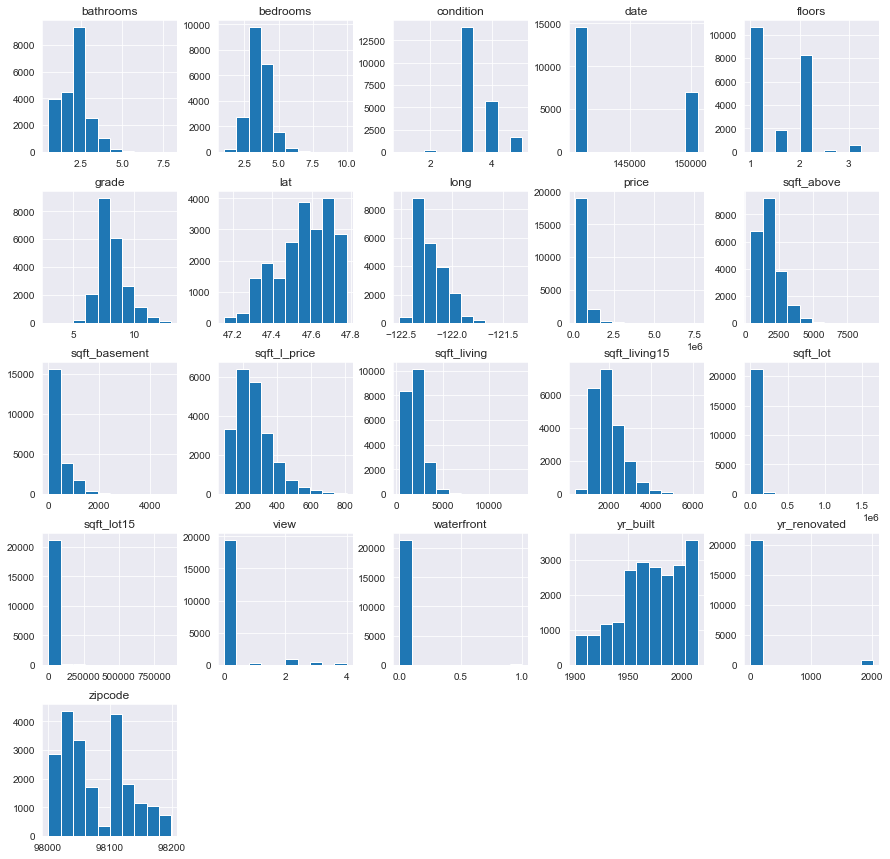

In [31]:
_ = df.hist(figsize=(15,15))
plt.savefig('figures/hist_all.png')

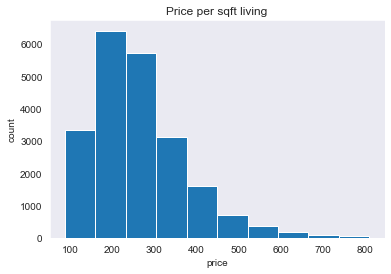

In [32]:
plt.hist(df["sqft_l_price"])
plt.title("Price per sqft living")
plt.xlabel("price")
plt.ylabel("count")
plt.savefig('figures/hist-price_sqft.png')
plt.show()

In [33]:
import plotly.express as px
fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1,
                        title="Real Estate Regional Cluster",
                        mapbox_style="open-street-map")
fig.show()

In [34]:
fig = px.density_mapbox(df_less_250k, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1,
                        title="Real Estate Regional Cluster less 250k",
                        mapbox_style="open-street-map")
fig.show()

In [35]:
fig = px.density_mapbox(df_less_1mio, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1,
                        title="Real Estate Regional Cluster Price less 1 Mio",
                        mapbox_style="open-street-map")
fig.show()

In [36]:
fig = px.density_mapbox(df_less_500k, lat='lat', lon='long', z='price', radius=4,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.5, opacity=1,
                        title="Real Estate Regional Cluster Price less 500k",
                        mapbox_style="open-street-map")
fig.show()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases late

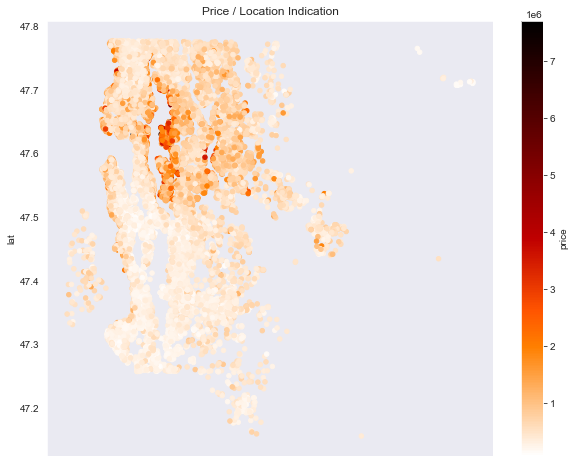

In [37]:
df.plot(kind="scatter", x="long", c="price", y="lat", figsize=(10, 8),
             cmap="gist_heat_r", colorbar=True, title="Price / Location Indication");
plt.savefig('figures/cluster-scatter.png')
plt.show()

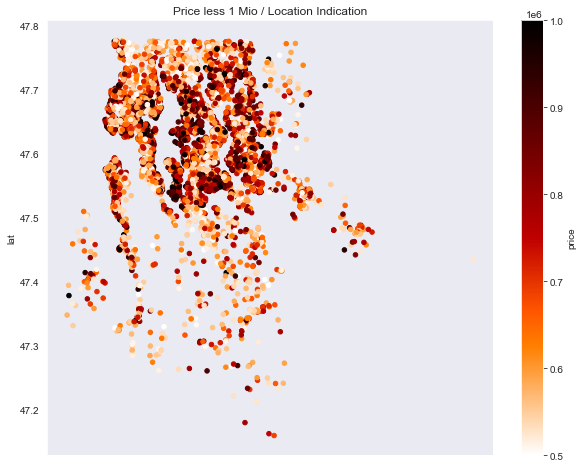

In [38]:
df_less_1mio.plot(kind="scatter", x="long", c="price", y="lat", figsize=(10, 8),
             cmap="gist_heat_r", colorbar=True, title="Price less 1 Mio / Location Indication");
plt.savefig('figures/cluster-scatter.png')
plt.show()

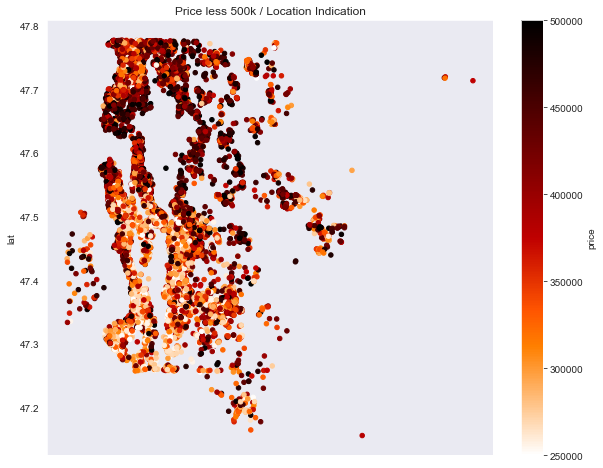

In [39]:
df_less_500k.plot(kind="scatter", x="long", c="price", y="lat", figsize=(10, 8),
             cmap="gist_heat_r", colorbar=True, title="Price less 500k / Location Indication");
plt.savefig('figures/cluster-scatter.png')
plt.show()